# H5XRAY

Exploring ways to visualize the structure of any HDF5 file. A work in progress!

A weekend project inspired by the h5cloud project at the 2023 ICESat-2 Hackweek.

__Jonathan Markel__  
3D Geospatial Laboratory  
The University of Texas at Austin  
09/09/2023

#### [Twitter](https://twitter.com/jonm3d) | [GitHub](https://github.com/jonm3d) | [Website](http://j3d.space) | [GoogleScholar](https://scholar.google.com/citations?user=KwxwFgYAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/j-markel/) 

In [1]:
from h5xray import h5xray
import matplotlib.pyplot as plt

In [2]:
input_file = "data/atl03_4.h5"

## Default Usage


Report for data/atl03_4.h5:
--------------------------------------------------
Elapsed time (s): 1.580
Total datasets: 1020
Total requests: 1276.0
Request byte size: 2097152 bytes
--------------------------------------------------
Top 5 datasets with most requests:
/gt3r/heights/lat_ph - 14.0 requests | Chunking: (10000,) | Number of Chunks: [616.0]
/gt3r/heights/lon_ph - 14.0 requests | Chunking: (10000,) | Number of Chunks: [616.0]
/gt1r/heights/lat_ph - 13.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
/gt1r/heights/lon_ph - 13.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
/gt1r/heights/h_ph - 11.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
--------------------------------------------------
System Info:
OS: posix
Platform: Linux
Platform Version: #1 SMP Tue Feb 14 21:50:23 UTC 2023
Python Version: 3.10.12
Machine: x86_64
Processor: x86_64
Current Working Directory: /home/jovyan/h5xray
Host Name: jupyter-jonm3d
Number of CPUs: 4
------------

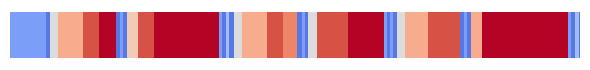

In [3]:
h5xray.analyze(input_file) # default usage

The report can also be silenced.

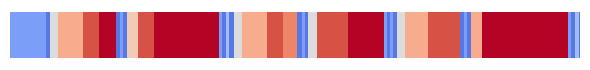

In [4]:
h5xray.analyze(input_file, report=False) # simple barcode

Use the debug flag to show plot details, and use plot options to adjust for your use case.

## Plot Details

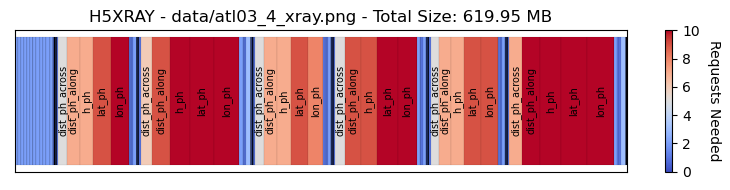

In [5]:
h5xray.analyze(input_file, report=False, plotting_options={'debug':True})


## Plot Customization


Report for data/atl03_4.h5:
--------------------------------------------------
Elapsed time (s): 1.610
Total datasets: 1020
Total requests: 1276.0
Request byte size: 2097152 bytes
--------------------------------------------------
Top 5 datasets with most requests:
/gt3r/heights/lat_ph - 14.0 requests | Chunking: (10000,) | Number of Chunks: [616.0]
/gt3r/heights/lon_ph - 14.0 requests | Chunking: (10000,) | Number of Chunks: [616.0]
/gt1r/heights/lat_ph - 13.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
/gt1r/heights/lon_ph - 13.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
/gt1r/heights/h_ph - 11.0 requests | Chunking: (10000,) | Number of Chunks: [583.0]
--------------------------------------------------
System Info:
OS: posix
Platform: Linux
Platform Version: #1 SMP Tue Feb 14 21:50:23 UTC 2023
Python Version: 3.10.12
Machine: x86_64
Processor: x86_64
Current Working Directory: /home/jovyan/h5xray
Host Name: jupyter-jonm3d
Number of CPUs: 4
------------

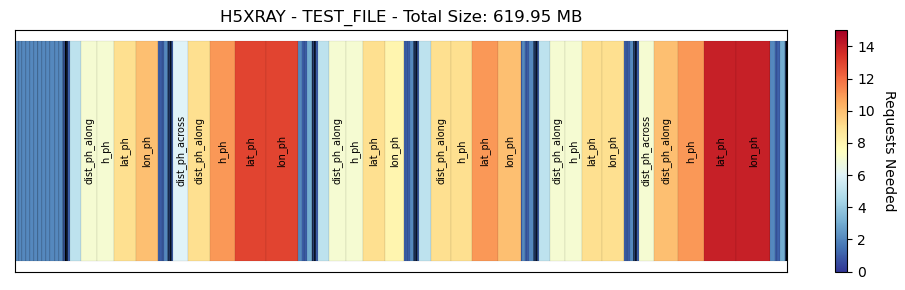

In [8]:
# try changing these!
plotting_options = {'debug':True, # whether to include the title, colormap, and labels
                    'cmap': plt.cm.RdYlBu_r, 
                    'byte_threshold':10 * 1024**2, # datasets with more than this get labeled
                    'font_size':7, # font size for dataset labels
                    'figsize':(10, 3),
                    'max_requests': 15, # specify colormap range
                    'title':'TEST_FILE',
                   }

h5xray.analyze(input_file, report=True, plotting_options=plotting_options)
